### Site Location Problem

In [1]:
import operator
import csv
import matplotlib 
import matplotlib.pyplot
import sys
#!conda install --yes --prefix {sys.prefix} numpy
import numpy
import ipywidgets as widgets
from ipywidgets import Button, Layout
from IPython.display import Javascript, display
from ipywidgets import widgets

In [2]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = widgets.Button(description='Click here to run analysis',
           layout=Layout(width='50%', height='80px'), button_style='danger')
button.on_click(run_all)

In [3]:
# Create matPlotLib figure
fig = matplotlib.pyplot.figure(figsize=(15, 10))
matplotlib.pyplot.rcParams['figure.figsize'] = [15, 10]

# Create lists
weightedgeology = []
weightedpopulation = []
weightedtransport = []
weighteddem = []

<Figure size 1080x720 with 0 Axes>

In [4]:
# Create sliders for values, ranged 0-100, in steps of 10.
slider1 = widgets.IntSlider(value=20,min=0,max=100,step=10,description='Geology:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='d')
slider2 = widgets.IntSlider(value=30,min=0,max=100,step=10,description='Transport:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='d')
slider3 = widgets.IntSlider(value=20,min=0,max=100,step=10,description='Population:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='d')
caption = widgets.Label(value='Please ensure that values below add up to 100 before running analysis')
display(caption, slider1, slider2, slider3);

Label(value='Please ensure that values below add up to 100 before running analysis')

IntSlider(value=20, continuous_update=False, description='Geology:', step=10)

IntSlider(value=30, continuous_update=False, description='Transport:', step=10)

IntSlider(value=20, continuous_update=False, description='Population:', step=10)

In [17]:
display(button)

<IPython.core.display.Javascript object>

Button(button_style='danger', description='Click here to run analysis', layout=Layout(height='80px', width='50…

In [18]:
# Importing each CSV file as a numpy array, and multiplying each value in the array by the weighting, 
# as determined by the slider value
# GEOLOGY
geology = numpy.array(list(csv.reader(open("geology.csv", encoding='UTF-8'), delimiter=","))).astype("int")
weightedgeology = geology*slider1.value
# TRANSPORT
transport = numpy.array(list(csv.reader(open("transport.csv", encoding='UTF-8'), delimiter=","))).astype("int")
weightedtransport = transport*slider2.value
# POPULATION
population = numpy.array(list(csv.reader(open("population.csv", encoding='UTF-8'), delimiter=","))).astype("int")
weightedpopulation = population*slider3.value

In [19]:
# WEIGHTED MAP
# Adding together the arrays (note on this element within acompanying report)
sumone = numpy.add(weightedgeology, weightedpopulation)
weighteddem =numpy.add(sumone, weightedtransport)
# Normalise arrays
weighteddemnormalised = numpy.divide(weighteddem, 100)

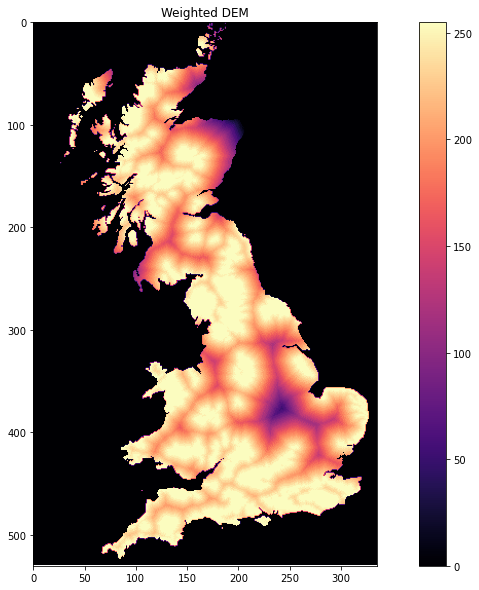

In [20]:
# Plotting normalised DEM
matplotlib.pyplot.xlim(0, 335)
matplotlib.pyplot.ylim(530, 0)
matplotlib.pyplot.imshow(weighteddemnormalised, cmap='magma')
matplotlib.pyplot.title('Weighted DEM', fontdict=None, loc='center', pad=None)
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()

In [21]:
# Saving output DEM to CSV
numpy.savetxt("output_dem.csv", weighteddemnormalised, delimiter=",", fmt='%i')

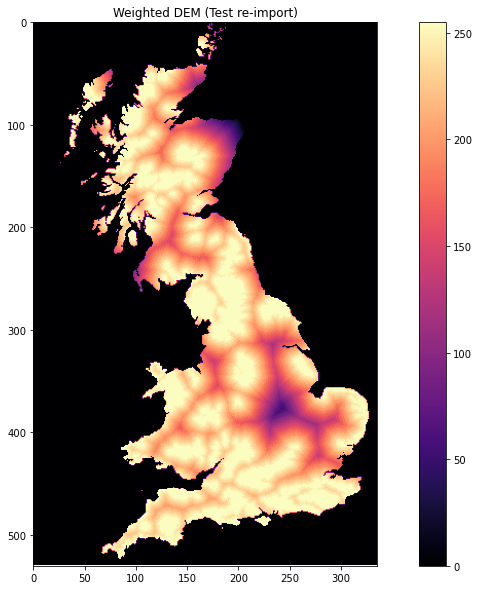

In [22]:
# Testing the output CSV works by re-importing and adding to a new plot. Plot should match one produced above.
output = numpy.array(list(csv.reader(open("output_dem.csv", encoding='UTF-8'), delimiter=","))).astype("int")

matplotlib.pyplot.xlim(0, 335)
matplotlib.pyplot.ylim(530, 0)
matplotlib.pyplot.imshow(output, cmap='magma')
matplotlib.pyplot.title('Weighted DEM (Test re-import)', fontdict=None, loc='center', pad=None)
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()